In [1]:
import cv2
import numpy as np
#from pymatting import estimate_alpha_cf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import sys
import os
from alpha_mapping import alpha_map
from scipy.signal import convolve2d
from blur_detection import add_motion_blur, add_circular_blur, get_blur_map, get_blur_map2
import pandas as pd
#sys.path.append('/home/msouda/Workspace/trimap_generator/trimap_package')
#from trimap_module import trimap

In [2]:
def imshow_cv2_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
path = "/home/msouda/Datasets/blur_detection_dataset/"

defocused = []
motion = []
for x in np.sort(os.listdir(path)):
    if 'out_of_focus' in x :
        defocused.append(path+x)
    if 'motion' in x:
        motion.append(path+x)

dataset = {'defocused':defocused, 'motion':motion}
colors = ['r', 'g', 'b']

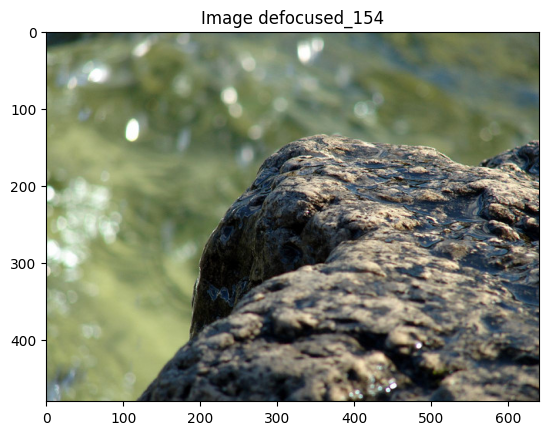

In [6]:
i = 154
type = 'defocused'

l = dataset[type]
file = l[i-1]
img = cv2.imread(file)
imshow_cv2_img(img)
plt.title(f'Image {type}_{i}')
plt.show()

### Laplacien

In [7]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
print(laplacian[0:200, 0:200].var())
print(laplacian[200:300, 300:400].var())

26.854725919722227
2379.896213865555


### Blur maps based on SVD

In [10]:
blur_map = get_blur_map(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

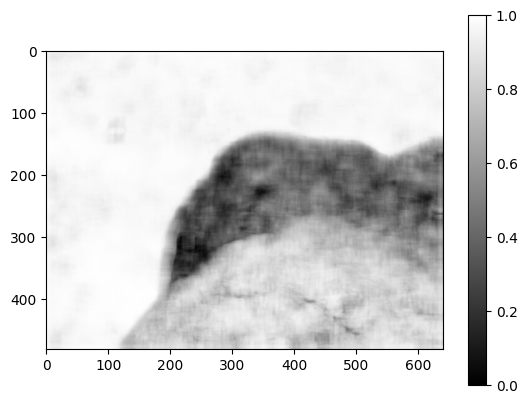

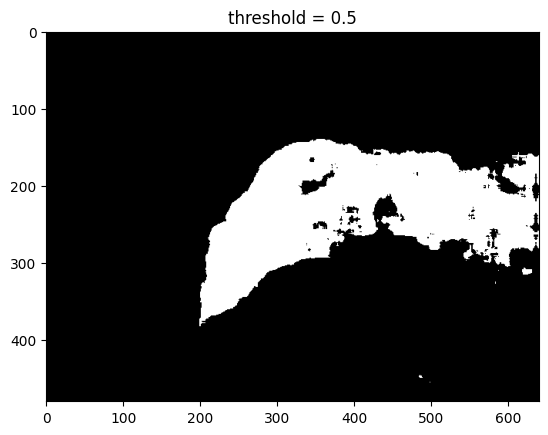

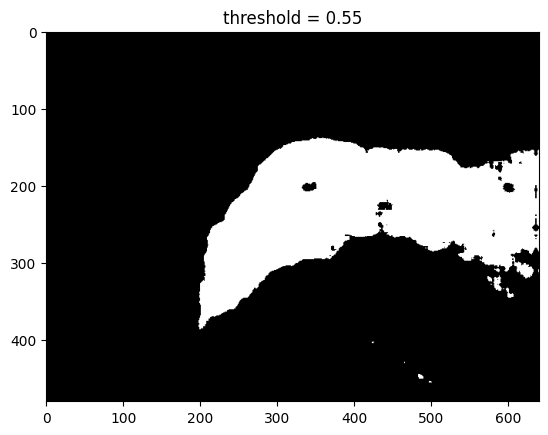

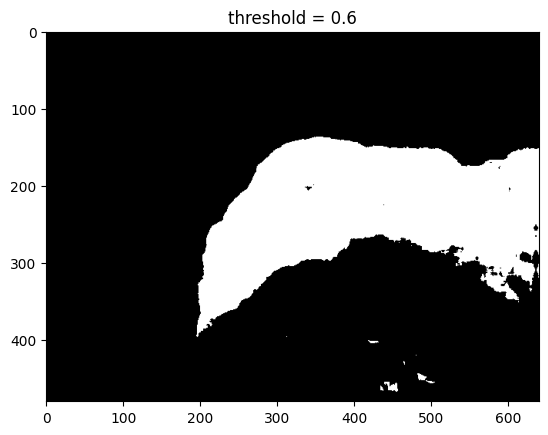

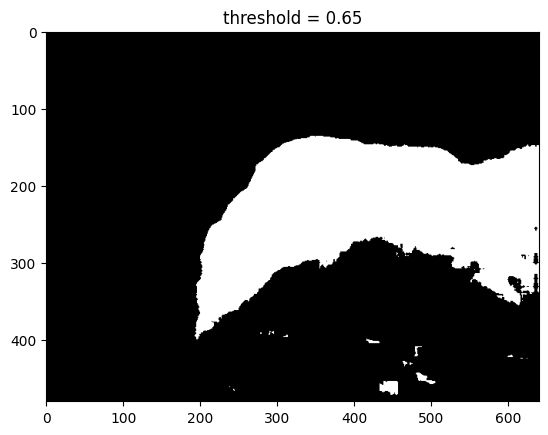

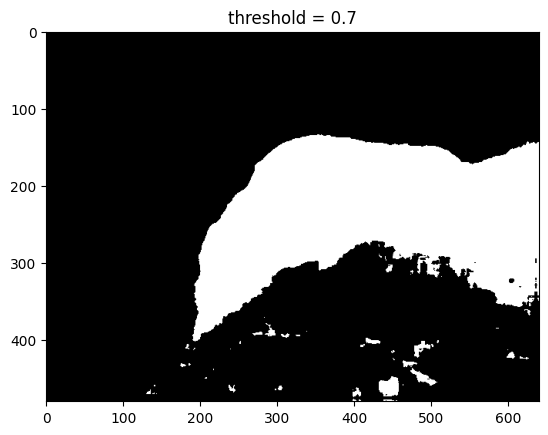

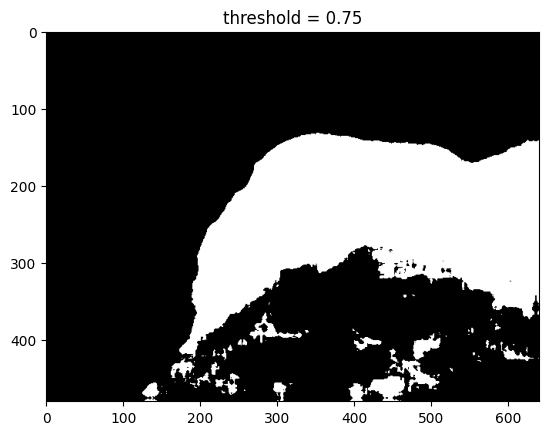

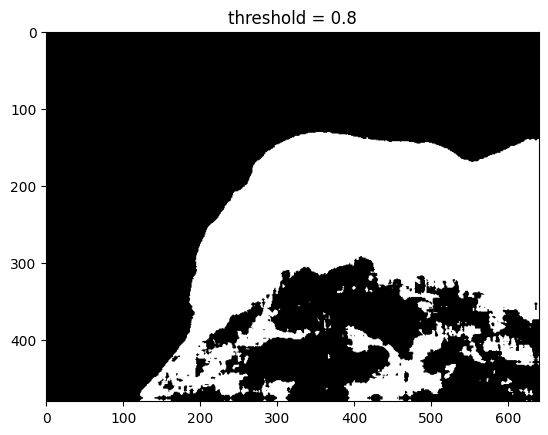

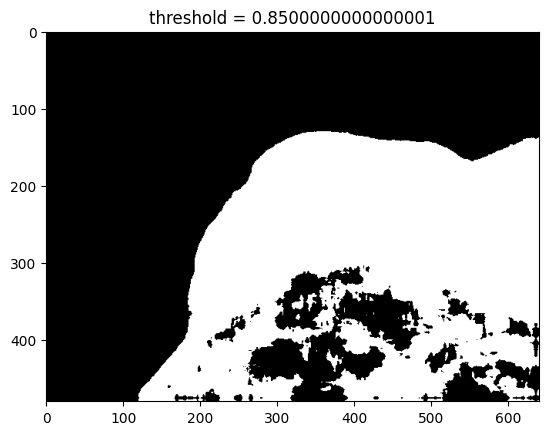

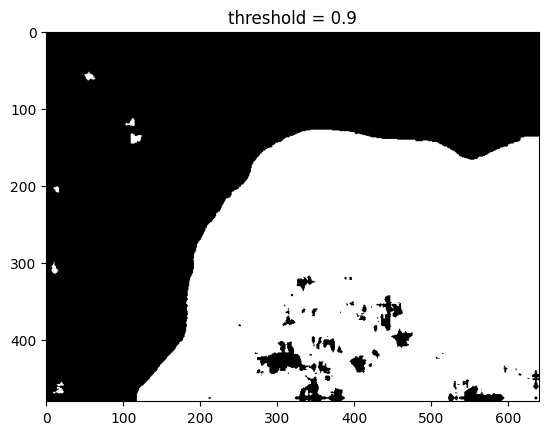

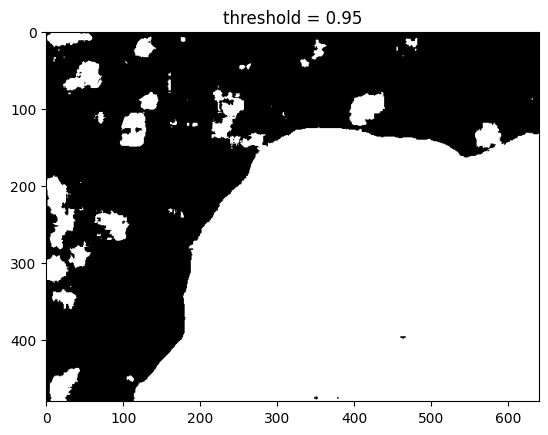

In [11]:
plt.imshow(blur_map, cmap='gray')
plt.colorbar()
plt.show()

for i in range(10):
    threshold = 0.5+i*0.05
    plt.imshow(blur_map<threshold, cmap='gray')
    plt.title(f'threshold = {threshold}')
    plt.show()

In [13]:
blur_map = get_blur_map(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 20, 5)

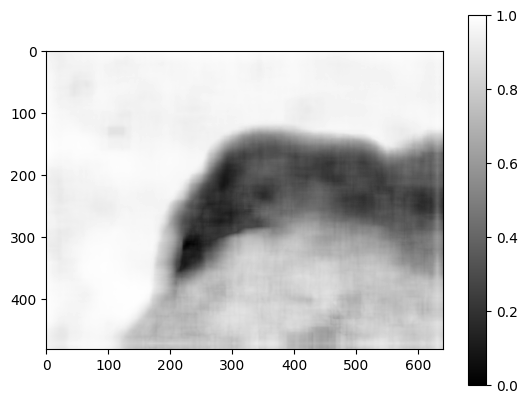

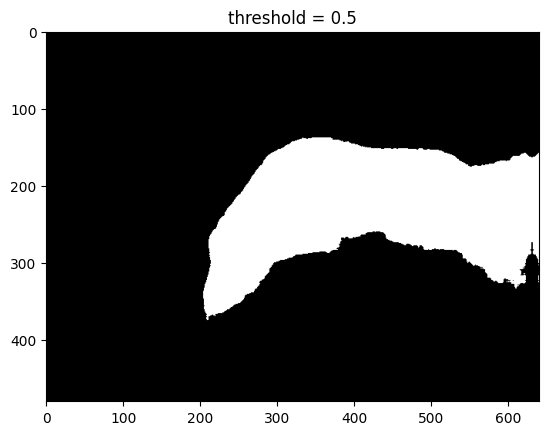

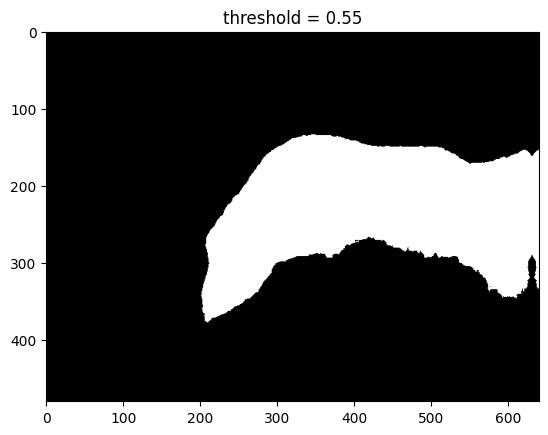

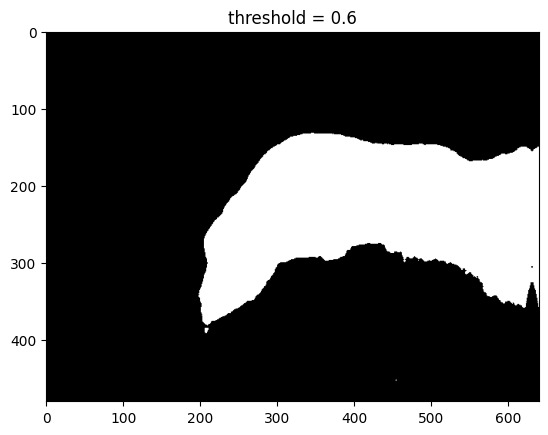

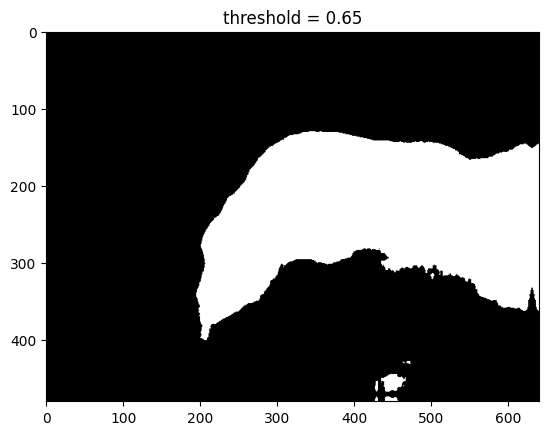

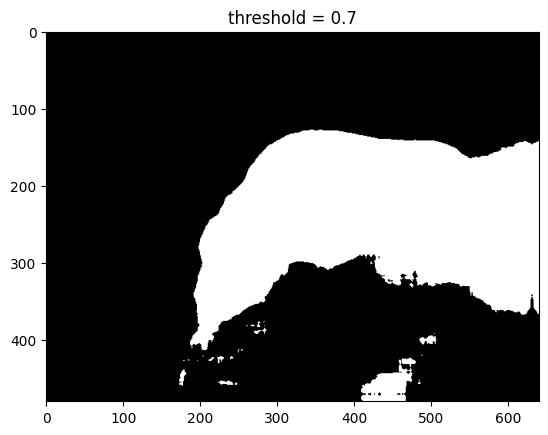

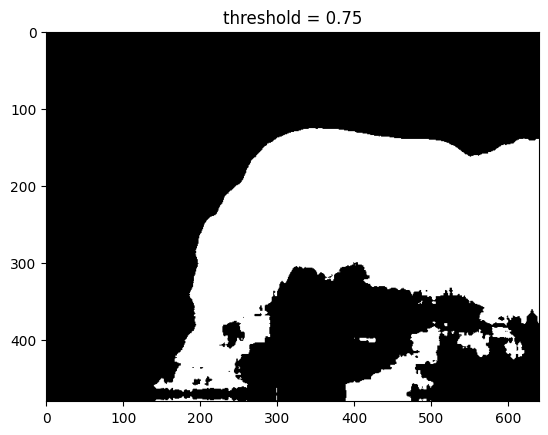

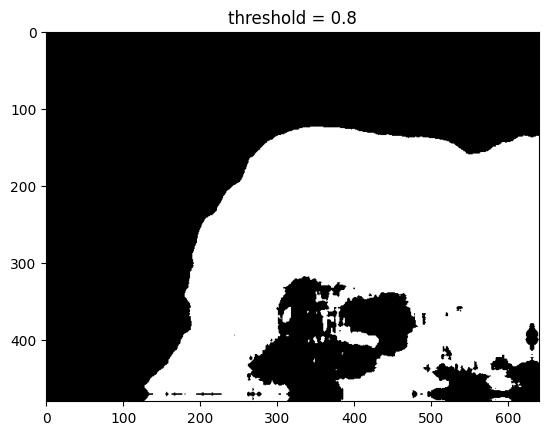

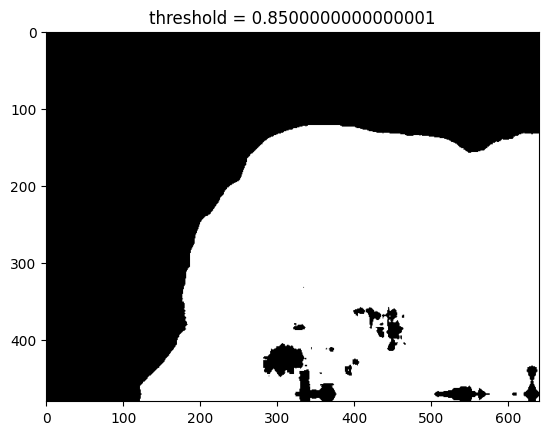

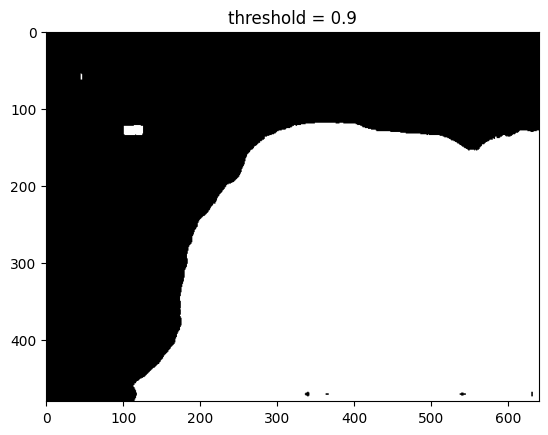

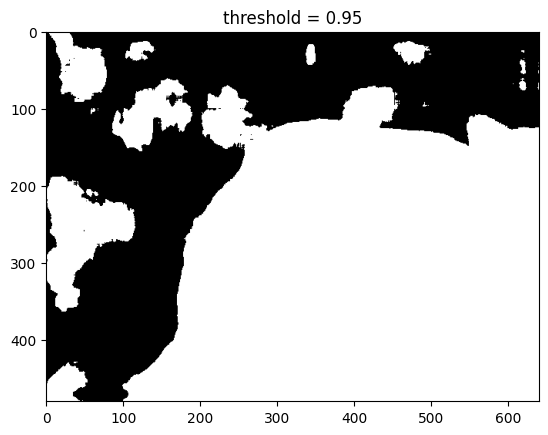

In [14]:
plt.imshow(blur_map, cmap='gray')
plt.colorbar()
plt.show()

for i in range(10):
    threshold = 0.5+i*0.05
    plt.imshow(blur_map<threshold, cmap='gray')
    plt.title(f'threshold = {threshold}')
    plt.show()

In [15]:
blur_map_2 = get_blur_map2(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 20, 5)

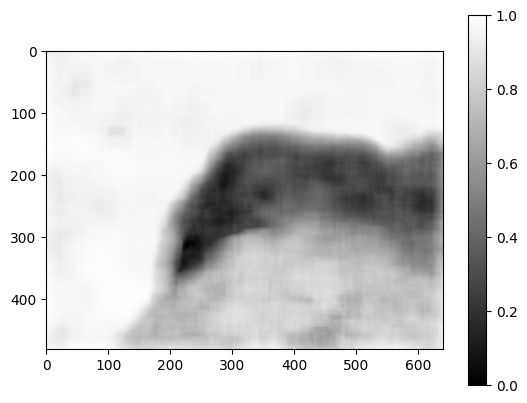

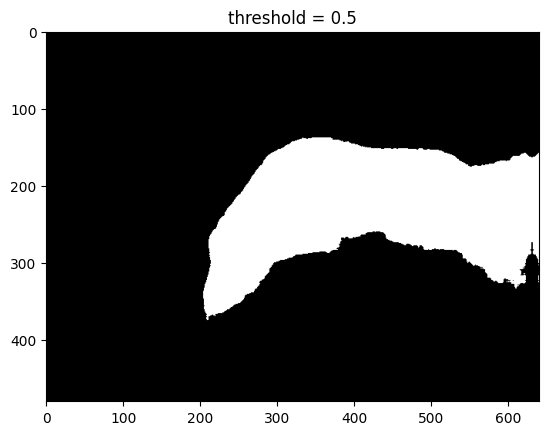

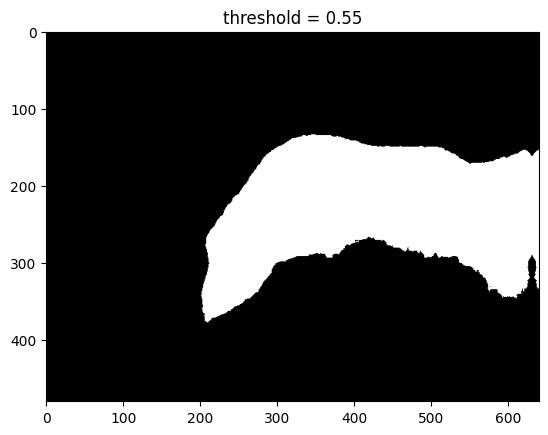

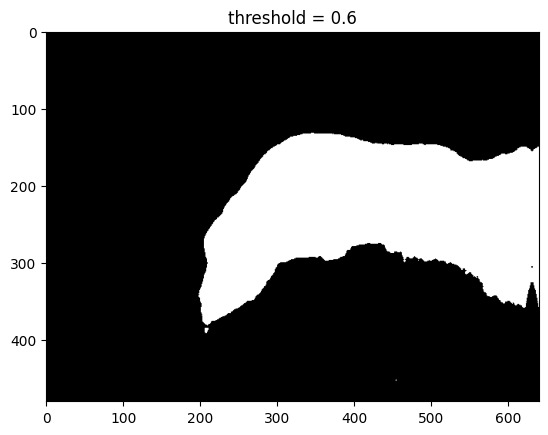

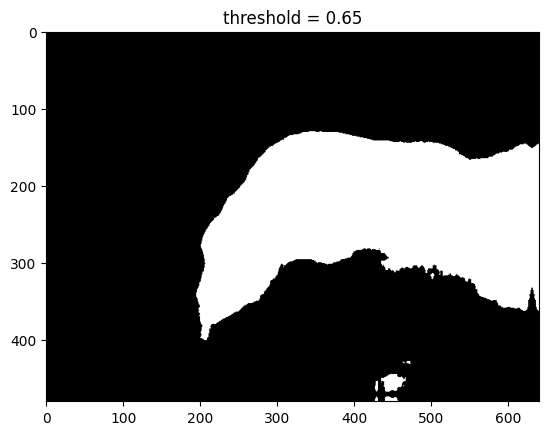

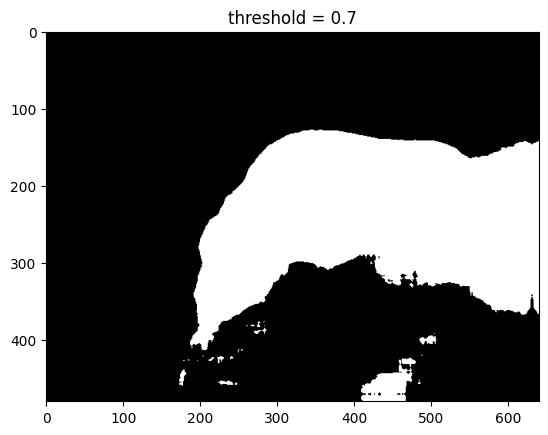

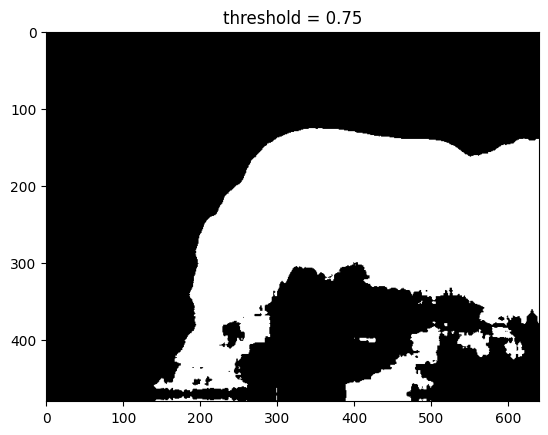

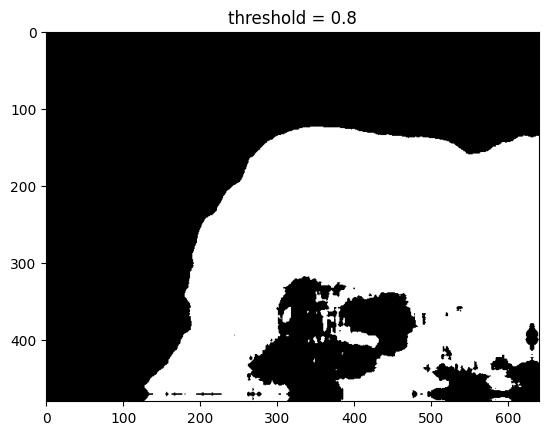

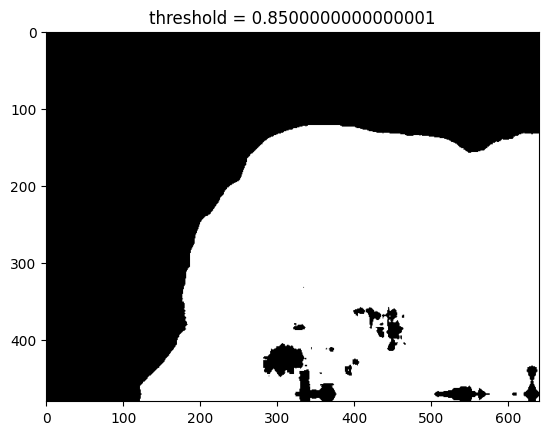

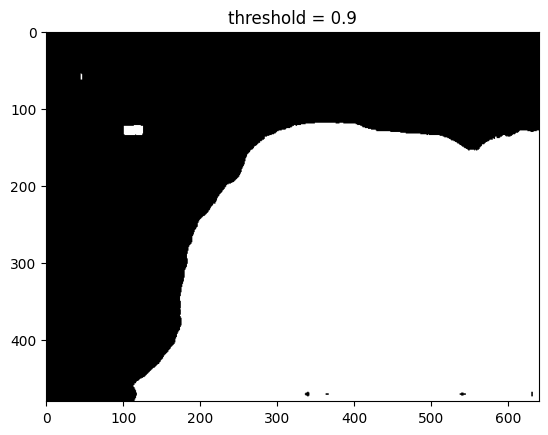

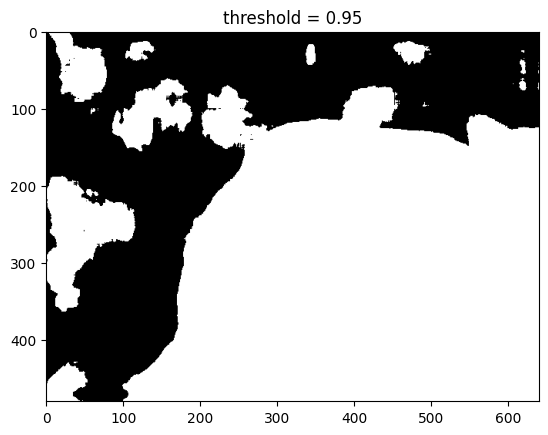

In [16]:
plt.imshow(blur_map_2, cmap='gray')
plt.colorbar()
plt.show()

for i in range(10):
    threshold = 0.5+i*0.05
    plt.imshow(blur_map<threshold, cmap='gray')
    plt.title(f'threshold = {threshold}')
    plt.show()

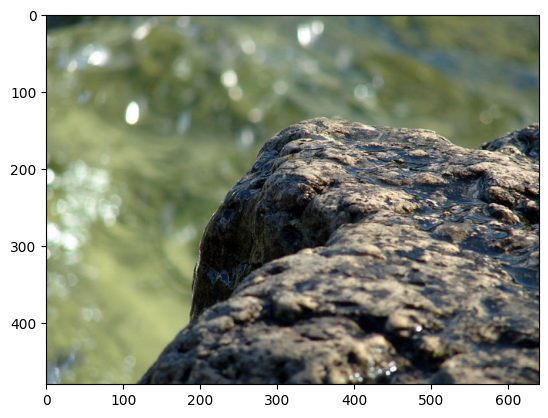

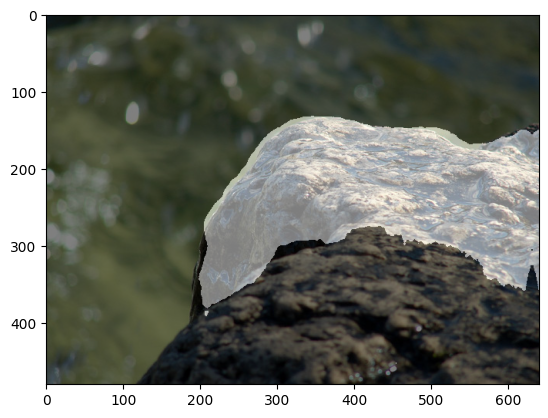

In [38]:
imshow_cv2_img(img)
plt.show()
imshow_cv2_img(img)
plt.imshow(blur_map<0.6, cmap='gray', alpha=0.5)
plt.show()
